In [1]:
import itertools
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure

import glob

from datetime import datetime

import statsmodels.api as sm




In [2]:
def read_file_to_df(path):
    all_files = glob.glob(path + '/*.csv')
    df = pd.DataFrame()
    for filename in all_files:
        temp = pd.read_csv(filename)
        df = pd.concat([df, temp])
    return df

In [3]:
de_rompert = read_file_to_df('./data/den bosch/sewer_data_db/flow/de Rompert/')
bokhoven = read_file_to_df('./data/den bosch/sewer_data_db/flow/Bokhoven/')
haarsteeg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Haarsteeg/')
helftheuvelweg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Helftheuvelweg/')
maaspoort = read_file_to_df('./data/den bosch/sewer_data_db/flow/Maaspoort/')
oud_engelseweg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Oud Engelseweg/')
engelerschans = read_file_to_df('./data/den bosch/sewer_data_db/flow/Engelerschans/')

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
#name_list = [bokhoven, de_rompert, haarsteeg, helftheuvelweg, maaspoort, oud_engelseweg, engelerschans]

In [5]:
def fix_data(data, name_of_pump):
    data = data[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
    data = data.rename(columns = {'hstWaarde' : '{}'.format(name_of_pump)})
    data['datetime'] = pd.to_datetime(data['datumBeginMeting'], format = '%Y-%m-%d %H:%M:%S')
    data['datumBeginMeting'] = pd.to_datetime(data['datumBeginMeting'], format='%Y-%m-%d %H:%M:%S')
    data = data.set_index('datumBeginMeting') # Datetime index
    return data

de_rompert = fix_data(de_rompert, 'de_rompert')
bokhoven = fix_data(bokhoven, 'bokhoven')
haarsteeg = fix_data(haarsteeg, 'haarsteeg')
helftheuvelweg = fix_data(helftheuvelweg, 'helftheuvelweg')
oud_engelseweg = fix_data(oud_engelseweg, 'oud_engelseweg')
engelerschans = fix_data(engelerschans, 'engelerschans')
maaspoort = fix_data(maaspoort, 'maaspoort')


In [6]:
drylist = ['dry_rompert', 'dry_bokhoven', 'dry_haarsteeg', 'dry_helftheuvelweg', 'dry_maaspoort', 'dry_oudengelseweg']

In [7]:
def dry_df(df):
    df = pd.read_csv(df, sep="\n", header=None)
    df.columns = ["a"]
    df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
    df = df[['datetime']]
    return df

dry_rompert = dry_df('dry_rompert')
dry_bokhoven = dry_df('dry_bokhoven')
dry_haarsteeg = dry_df('dry_haarsteeg')
dry_helftheuvelweg = dry_df('dry_helftheuvelweg')
dry_maaspoort = dry_df('dry_maaspoort')
dry_oudengelseweg = dry_df('dry_oudengelseweg')


In [8]:
drydfs = [dry_rompert, dry_bokhoven, dry_haarsteeg, dry_helftheuvelweg, dry_maaspoort, dry_oudengelseweg]

In [9]:
de_rompert = de_rompert.groupby(pd.TimeGrouper('5Min'))['de_rompert'].mean()
bokhoven = bokhoven.groupby(pd.TimeGrouper('5Min'))['bokhoven'].mean()
haarsteeg = haarsteeg.groupby(pd.TimeGrouper('5Min'))['haarsteeg'].mean()
helftheuvelweg = helftheuvelweg.groupby(pd.TimeGrouper('5Min'))['helftheuvelweg'].mean()
maaspoort = maaspoort.groupby(pd.TimeGrouper('5Min'))['maaspoort'].mean()
oud_engelseweg = oud_engelseweg.groupby(pd.TimeGrouper('5Min'))['oud_engelseweg'].mean()



C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\s

In [10]:
def filterDryDays(data, dry, name_of_pump):
    data = pd.DataFrame(data)
    rain = np.where(data.index.isin(dry['datetime']), 1, 0)
    data['dry'] = rain
    data = data.reset_index()
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

de_rompert = filterDryDays(de_rompert, dry_rompert, 'de_rompert')
bokhoven = filterDryDays(bokhoven, dry_bokhoven, 'bokhoven')
haarsteeg = filterDryDays(haarsteeg, dry_haarsteeg, 'haarsteeg')
helftheuvelweg = filterDryDays(helftheuvelweg, dry_helftheuvelweg, 'helftheuvelweg')
maaspoort = filterDryDays(maaspoort, dry_maaspoort, 'maaspoort')
oud_engelseweg = filterDryDays(oud_engelseweg, dry_oudengelseweg, 'oud_engelseweg')



In [11]:
print(len(de_rompert))
de_rompert = de_rompert.dropna()
print(len(de_rompert))


165888
165854


In [12]:
from sklearn.ensemble.forest import RandomForestRegressor

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
X = (de_rompert[['datumBeginMeting', 'dry']])
y = (de_rompert['de_rompert'])
    
X_train = X[X.index < 0.8*len(de_rompert)]
y_train = y[y.index < 0.8*len(de_rompert)]              
    
X_test = X[X.index >= 0.8*len(de_rompert)]    
y_test = y[y.index >= 0.8*len(de_rompert)]

In [14]:
RF_Model = RandomForestRegressor(n_estimators=2000, max_features=1, oob_score=True)

In [18]:
labels = y_train#[:, None]
features = X_train.drop('datumBeginMeting', axis = 1)
X_train = X_train.drop('datumBeginMeting', axis = 1)
X_test = X_test.drop('datumBeginMeting', axis = 1)
rgr=RF_Model.fit(features, labels)


KeyError: "['datumBeginMeting'] not found in axis"

In [16]:
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted'}).set_index('predicted')

X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted'}).set_index('predicted')
RF_predict = X_train_predict.append(X_test_predict)
RF_predict = RF_predict.reset_index()


,dry
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


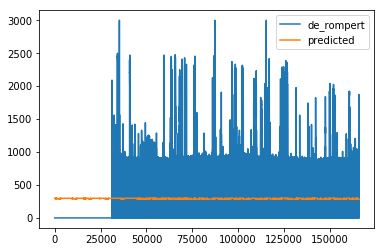

In [19]:
de_rompert['predicted'] = RF_predict['predicted']
de_rompert
de_rompert[['de_rompert', 'predicted']].plot()
X_train

#### Time series analysis

In [ ]:
# de_rompert_series = de_rompert['interaction']
# bokhoven_series = bokhoven['interaction']
# haarsteeg_series = haarsteeg['interaction']
# helftheuvelweg_series = helftheuvelweg['interaction']
# maaspoort_series = maaspoort['interaction']
# oud_engelseweg_series = oud_engelseweg['interaction']


In [ ]:
# dry = de_rompert[de_rompert['dry'] == 1]
# dry = dry[dry['de_rompert'] != 0]
# dry = dry.groupby(pd.TimeGrouper('D'))

# data = pd.DataFrame()
# for i, j in dry:
#     if len(j) == 288:
#         data = data.append(j)
# data['de_rompert'].plot()

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR


train = de_rompert[:int(0.8*(len(de_rompert)))]
valid = de_rompert[int(0.8*(len(de_rompert))):]


In [ ]:
len(train[train['de_rompert'].isna()])


# model = VAR(endog=train)
# model_fit = model.fit()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


In [ ]:

plot_acf(series, lags = 10)
plt.xlim(0,10)
plt.ylim(0, 1)
pyplot.show()

plot_pacf(series, lags = 10)
plt.xlim(0,10)
plt.ylim(0, 1)
pyplot.show()

In [ ]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARMAResults
print(ARMAResults.summary())

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(y)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq = 1)
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue